# 1. Transformación de Dataframes con Pandas

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos en columnas.

In [2]:
import numpy as np
import pandas as pd

# Creación de un Arreglo
ary = np.array([[1,2,3],[4,5,6],[7,8,9]])
df = pd.DataFrame(data = ary, columns = ['D','E','F'], index = ['A','B','C'])
df.head(2)

,D,E,F
A,1,2,3
B,4,5,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D       3 non-null      int32
 1   E       3 non-null      int32
 2   F       3 non-null      int32
dtypes: int32(3)
memory usage: 60.0+ bytes


In [4]:
df.shape

(3, 3)

In [5]:
df.describe()

,D,E,F
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [6]:
print(df.columns)
print(df.index)

Index(['D', 'E', 'F'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')


In [7]:
# adicion de filas y columas
df.loc['G'] = [11,12,13]
df['Z'] = [14,15,16,17]
df

,D,E,F,Z
A,1,2,3,14
B,4,5,6,15
C,7,8,9,16
G,11,12,13,17


In [8]:
# Extracción de columas
df[['D','E']]

,D,E
A,1,2
B,4,5
C,7,8
G,11,12


In [9]:
# Extracción de filas
df.iloc[0:3]

,D,E,F,Z
A,1,2,3,14
B,4,5,6,15
C,7,8,9,16


In [10]:
# Cambiar todas las columas
# df.columns = [lista con el nombre de las columas en el mismo orden]

# Si solamente quiero cambiar ciertas columas
df.rename(columns={'D':'Columna1', 'E':'Columna2'}, inplace=True)       # Se usa un diccionario con el nombre actual:nombre a cambiar
df

,Columna1,Columna2,F,Z
A,1,2,3,14
B,4,5,6,15
C,7,8,9,16
G,11,12,13,17


In [11]:
# para cambiar el nombre de los indices
df.rename(index={'A':'Index1'}, inplace=True)
df

,Columna1,Columna2,F,Z
Index1,1,2,3,14
B,4,5,6,15
C,7,8,9,16
G,11,12,13,17


In [12]:
df2 = df.sort_values("Columna1", ascending=False)
df2

,Columna1,Columna2,F,Z
G,11,12,13,17
C,7,8,9,16
B,4,5,6,15
Index1,1,2,3,14


In [13]:
# Slicing
df[(df['Columna1'] > 5) & (df['Columna2'] > 10)]

,Columna1,Columna2,F,Z
G,11,12,13,17


## Ejercicio 1: 
Mediante el uso de las librerías de Numpy y Pandas desarrolle un código en python que sea capaz de generar un dataframe en el vídeo

In [14]:
data1 = np.array([['Bella', 'Labrador', 'Café', 56, 24, '2013-07-01'], 
        ['Charlie', 'Poodle', 'Negro', 43, 24, '2016-09-16'],
        ['Lucy', 'Chow Chow', 'Café', 46, 24, '2014-08-25'],
        ['Cooper', 'Schnauzer', 'Gris', 49, 17, '2011-12-11'],
        ['Bernie', 'San Bernardo', 'Blanco', 77, 74, '2018-02-27']])
    
df_ejercicio1 = pd.DataFrame(data= data1, columns=['Nombre', 'Raza', 'Color', 'Altura_cm', 'Peso_kg', 'Fecha_Nac'], )
df_ejercicio1.info()            # Notar que todos los números los toma como strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nombre     5 non-null      object
 1   Raza       5 non-null      object
 2   Color      5 non-null      object
 3   Altura_cm  5 non-null      object
 4   Peso_kg    5 non-null      object
 5   Fecha_Nac  5 non-null      object
dtypes: object(6)
memory usage: 368.0+ bytes


In [15]:
# Extraer todos los perros que tengan una fecha de anterior al primero de enero de 2015

df_ejercicio1[df_ejercicio1['Fecha_Nac'] < '2015-01-01']

,Nombre,Raza,Color,Altura_cm,Peso_kg,Fecha_Nac
0,Bella,Labrador,Café,56,24,2013-07-01
2,Lucy,Chow Chow,Café,46,24,2014-08-25
3,Cooper,Schnauzer,Gris,49,17,2011-12-11


In [16]:
# Extraer registros de perros con estatura mayor a 50 cm

df_ejercicio1['Altura_cm'] = df_ejercicio1['Altura_cm'].astype(int)       # Convertir columna de texto a números
df_ejercicio1[df_ejercicio1['Altura_cm'] > 50]


,Nombre,Raza,Color,Altura_cm,Peso_kg,Fecha_Nac
0,Bella,Labrador,Café,56,24,2013-07-01
4,Bernie,San Bernardo,Blanco,77,74,2018-02-27


In [17]:
# Agregar una nueva columna que calcule el indice de masa Múscular (IMM) para cada perro
# IMM = peso en kg / (altura en metros)**2

df_ejercicio1['Peso_kg'] = df_ejercicio1['Peso_kg'].astype(int)
df_ejercicio1['IMM'] = df_ejercicio1['Peso_kg']/(df_ejercicio1['Altura_cm']/100)**2
df_ejercicio1

,Nombre,Raza,Color,Altura_cm,Peso_kg,Fecha_Nac,IMM
0,Bella,Labrador,Café,56,24,2013-07-01,76.530612
1,Charlie,Poodle,Negro,43,24,2016-09-16,129.799892
2,Lucy,Chow Chow,Café,46,24,2014-08-25,113.421550
3,Cooper,Schnauzer,Gris,49,17,2011-12-11,70.803832
4,Bernie,San Bernardo,Blanco,77,74,2018-02-27,124.810255


# Agregación de Dataframes y Extracción e Indexación en Dataframes

Se obtendrán estadísticos y a efectuar operaciones de agrupamiento para el análisis de datos 

In [18]:
df_ejercicio2 = df_ejercicio1.iloc[:,0:6]
df_ejercicio2.loc[len(df_ejercicio2)] = ['Max', 'Chow Chow', 'Blanco', int(45), int(28), '2019-03-27']
df_ejercicio2.loc[len(df_ejercicio2)] = ['Reed', 'Schnauzer', 'Negro', int(45), int(15), '2017-09-18']
df_ejercicio2

,Nombre,Raza,Color,Altura_cm,Peso_kg,Fecha_Nac
0,Bella,Labrador,Café,56,24,2013-07-01
1,Charlie,Poodle,Negro,43,24,2016-09-16
2,Lucy,Chow Chow,Café,46,24,2014-08-25
3,Cooper,Schnauzer,Gris,49,17,2011-12-11
4,Bernie,San Bernardo,Blanco,77,74,2018-02-27
5,Max,Chow Chow,Blanco,45,28,2019-03-27
6,Reed,Schnauzer,Negro,45,15,2017-09-18


In [19]:
print(df_ejercicio2['Peso_kg'].mean())     #Promedio
print(df_ejercicio2['Fecha_Nac'].min())    #Minimo (mascota mas vieja)
print(df_ejercicio2['Altura_cm'].agg(lambda x: x.quantile(.8)))     # Aqui se usa una función "custom", quantile es una funcion de agregación pripia de un np.Array
print(df_ejercicio2[['Altura_cm', 'Peso_kg']].agg(lambda x: x.quantile(.8)))        # Aquí se aplica el método agg a dos dataframes
print(df_ejercicio2['Altura_cm'].agg([lambda x: x.quantile(.9), lambda x: x.quantile(.8)]))       # Se puede aplicar una lista de funciones al mismo o a una lista de arrays

29.428571428571427
2011-12-11
54.60000000000001
Altura_cm    54.6
Peso_kg      27.2
dtype: float64
<lambda>    64.4
<lambda>    54.6
Name: Altura_cm, dtype: float64


In [20]:
# Otras funciones
print(df_ejercicio2['Altura_cm'].cumsum())      # Arroja una pandas series con la suma acumulativa del pandas series
# df_ejercicio2['Altura_cm'].cummin()

# CONTEOS
df_ejercicio2['Raza'].value_counts()            # Encuentra los valores únicos y cuenta la frecuencia de cada uno
df_ejercicio2['Raza'].value_counts(normalize=True)            # Para sacar la frecuencia relativa (porcentaje de ocurrencias)

0     56
1     99
2    145
3    194
4    271
5    316
6    361
Name: Altura_cm, dtype: int64


Chow Chow       0.285714
Schnauzer       0.285714
Labrador        0.142857
Poodle          0.142857
San Bernardo    0.142857
Name: Raza, dtype: float64

In [21]:
# Agregados por grupo

# Metodo Arcaico
print(df_ejercicio2[df_ejercicio2['Color']=='Blanco']['Peso_kg'].mean())
print(df_ejercicio2[df_ejercicio2['Color']=='Café']['Peso_kg'].mean())
# etc, etc


#Smart Way
df_ejercicio2.groupby('Color')['Peso_kg'].mean()
df_ejercicio2.groupby('Color')['Peso_kg'].agg([min,max,sum]) # Se puede calcular más de un estadístico


51.0
24.0


,min,max,sum
Color,,,
Blanco,28,74,102
Café,24,24,48
Gris,17,17,17
Negro,15,24,39


In [22]:
df_ejercicio2.groupby(['Raza', 'Color'])['Peso_kg'].mean()      #Se puede agrupar a más de un nivel para obtener más detalle

Raza          Color 
Chow Chow     Blanco    28.0
              Café      24.0
Labrador      Café      24.0
Poodle        Negro     24.0
San Bernardo  Blanco    74.0
Schnauzer     Gris      17.0
              Negro     15.0
Name: Peso_kg, dtype: float64

### Pivots

In [23]:
df_ejercicio2.pivot_table(values='Peso_kg', index=['Color','Raza'], aggfunc=[np.mean, np.median])

"""Values es el campo que se quiere calcular, index las rows, agg funcion las operaciones de aggregacion que se quieren llevar a cabo en la pivot"""

'Values es el campo que se quiere calcular, index las rows, agg funcion las operaciones de aggregacion que se quieren llevar a cabo en la pivot'

In [24]:
df_ejercicio2.pivot_table(values='Peso_kg', index='Color', columns='Raza', aggfunc=[np.mean, np.median],fill_value=0, margins=True) 
# Fill Value cambia todos los valores NaN por lo que le indiques, margins te agrega los grand totals


mean                                                      median  \
Raza   Chow Chow Labrador Poodle San Bernardo Schnauzer        All Chow Chow   
Color                                                                          
Blanco        28        0      0           74         0  51.000000        28   
Café          24       24      0            0         0  24.000000        24   
Gris           0        0      0            0        17  17.000000         0   
Negro          0        0     24            0        15  19.500000         0   
All           26       24     24           74        16  29.428571        26   

                                                     
Raza   Labrador Poodle San Bernardo Schnauzer   All  
Color                                                
Blanco        0      0           74         0  51.0  
Café         24      0            0         0  24.0  
Gris          0      0            0        17  17.0  
Negro         0     24            0        15  19.5  
All          24     24           74        16  24.0

# Extracción e indexación en DataFrames

In [29]:
# Asignación de índices (Con la columna del nombre de la mascota)

df_ejercicio3 = df_ejercicio2
df_ejercicio3 = df_ejercicio3.set_index('Nombre')
df_ejercicio3

,Raza,Color,Altura_cm,Peso_kg,Fecha_Nac
Nombre,,,,,
Bella,Labrador,Café,56,24,2013-07-01
Charlie,Poodle,Negro,43,24,2016-09-16
Lucy,Chow Chow,Café,46,24,2014-08-25
Cooper,Schnauzer,Gris,49,17,2011-12-11
Bernie,San Bernardo,Blanco,77,74,2018-02-27
Max,Chow Chow,Blanco,45,28,2019-03-27
Reed,Schnauzer,Negro,45,15,2017-09-18


In [34]:
# se puede deshacer esa operación
df_ejercicio3 = df_ejercicio3.reset_index() # Si además de resetear el index quiero eliminar los datos que había en el index, puedo agregar el argumento drop=True
df_ejercicio3

,Nombre,Raza,Color,Altura_cm,Peso_kg,Fecha_Nac
0,Bella,Labrador,Café,56,24,2013-07-01
1,Charlie,Poodle,Negro,43,24,2016-09-16
2,Lucy,Chow Chow,Café,46,24,2014-08-25
3,Cooper,Schnauzer,Gris,49,17,2011-12-11
4,Bernie,San Bernardo,Blanco,77,74,2018-02-27
5,Max,Chow Chow,Blanco,45,28,2019-03-27
6,Reed,Schnauzer,Negro,45,15,2017-09-18


In [62]:
# Agregar indices multiples

df_ejercicio3_2 = df_ejercicio3
df_ejercicio3_2 = df_ejercicio3_2.set_index(['Color', 'Raza'])      
df_ejercicio3_2.loc[['Café','Negro']]
df_ejercicio3_2.loc[[('Café', 'Labrador'), ('Negro', 'Poodle')]]            # Se pueden buscar resultados específicos con ambos índices usando una lista de tuplas
df_ejercicio3_2.loc[('Café',)]                                              # No se puede buscar solamente con el segundo índice, pero sí solamente con el primero

C:\Users\CARLOS DEL VALLE\AppData\Local\Temp\ipykernel_17892\3718652283.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_ejercicio3_2.loc[('Café',)]


,Nombre,Altura_cm,Peso_kg,Fecha_Nac
Raza,,,,
Labrador,Bella,56,24,2013-07-01
Chow Chow,Lucy,46,24,2014-08-25


In [64]:
# se pueden hacer ordenamientos por multiindex

df_ejercicio3_2.sort_index(level=['Raza', 'Color'], ascending=[True, False])

,,Nombre,Altura_cm,Peso_kg,Fecha_Nac
Color,Raza,,,,
Café,Chow Chow,Lucy,46,24,2014-08-25
Blanco,Chow Chow,Max,45,28,2019-03-27
Café,Labrador,Bella,56,24,2013-07-01
Negro,Poodle,Charlie,43,24,2016-09-16
Blanco,San Bernardo,Bernie,77,74,2018-02-27
Negro,Schnauzer,Reed,45,15,2017-09-18
Gris,Schnauzer,Cooper,49,17,2011-12-11


In [72]:
df_ejercicio3_2.iloc[:, 0:3]

Nombre  Altura_cm  Peso_kg
Color  Raza                                     
Café   Labrador        Bella         56       24
Negro  Poodle        Charlie         43       24
Café   Chow Chow        Lucy         46       24
Gris   Schnauzer      Cooper         49       17
Blanco San Bernardo   Bernie         77       74
       Chow Chow         Max         45       28
Negro  Schnauzer        Reed         45       15

# Ejercicio 4

In [78]:
#Mediante el uso de la tabla pivote sobre el DataFrame de mascotas, extraiga los registros donde la raza de la mascota es Labrador, poodle y san bernardo
df_ejercicio4 = df_ejercicio2
df_ejercicio4 = df_ejercicio4.pivot_table(index='Raza', columns='Color', values='Altura_cm')
df_ejercicio4.loc[['Labrador', 'Poodle', 'San Bernardo']]

Color,Blanco,Café,Gris,Negro
Raza,,,,
Labrador,NaN,56.0,NaN,NaN
Poodle,NaN,NaN,NaN,43.0
San Bernardo,77.0,NaN,NaN,NaN


## Creación y visualización de dataframes
Importar datos de .csv

In [140]:
# Importación
iris_df = pd.read_csv('D:\Documentos\DataAnalysis\EBAC\Python\Modulo7\Iris.csv')
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [141]:
# Cambiemos un poco el df y exportamos el archivo

df_to_export = iris_df.iloc[:100, 1:3]
df_to_export

,sepal.width,petal.length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
95,3.0,4.2
96,2.9,4.2
97,2.9,4.3
98,2.5,3.0


In [142]:
df_to_export.to_csv('Iris_modificado.csv')

# Ejercicio 5

Generar un histograma de frecuencias para la variable "sepal.length" y un gráfico de barras que muestra la longitud promedio del pétalo por cada tipo de flor

(array([ 5., 11., 25., 11., 21., 16., 19., 14., 15.,  6.,  2.,  5.]),
 array([4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <BarContainer object of 12 artists>)

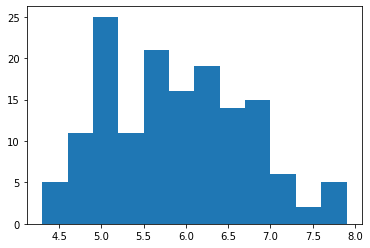

In [144]:
from cmath import sqrt
import matplotlib.pyplot as plt

num_intervalos = round(len(iris_df) ** .5 ,0)

plt.hist(iris_df['sepal.length'], bins=int(num_intervalos))

<BarContainer object of 3 artists>

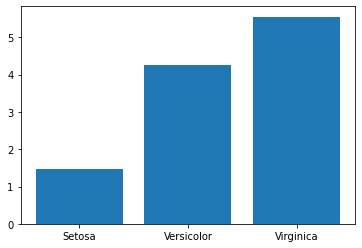

In [146]:
lenght_by_species = iris_df.groupby('variety')['petal.length'].mean()
plt.bar(lenght_by_species.index, lenght_by_species.values)